# Exploring Data Pathologies in Conjoint Studies

*The effect of pathological behavior on HBMNL models*

In [1]:
from PYTHON import utils
from PYTHON import stan_utility
import matplotlib.pyplot as plt
import pystan
import numpy as np
%matplotlib inline

plt.style.use("./analysis.mplstyle")

In [2]:
import importlib
importlib.reload(utils)

<module 'PYTHON.utils' from '/Users/derekmiller/repos/clever-randomization/PYTHON/utils.py'>

*generate data and build models*

In [3]:
# initialize dictionaries to store the various models, data, and fit objects
DATA = dict()
MODEL = dict()
FIT = dict()

In [4]:
model_list = ['mnl_vanilla', 'mnl_fhorseshoe']

# generate data
DATA['none'] = utils.generate_simulated_data(pathology_type='none')
DATA['all'] = utils.generate_simulated_data(pathology_type='all')

# get models
for m in model_list:
    MODEL[m] = utils.get_model(model_name=m)

## Results

In [9]:
# fit model
m = 'mnl_vanilla'
d = 'all'
f = m + "|" + d

FIT[f] = MODEL[m].sampling(DATA[d], iter=300, control={'adapt_delta':.9, 'max_treedepth':3})

Results for fit mnl_vanilla|all


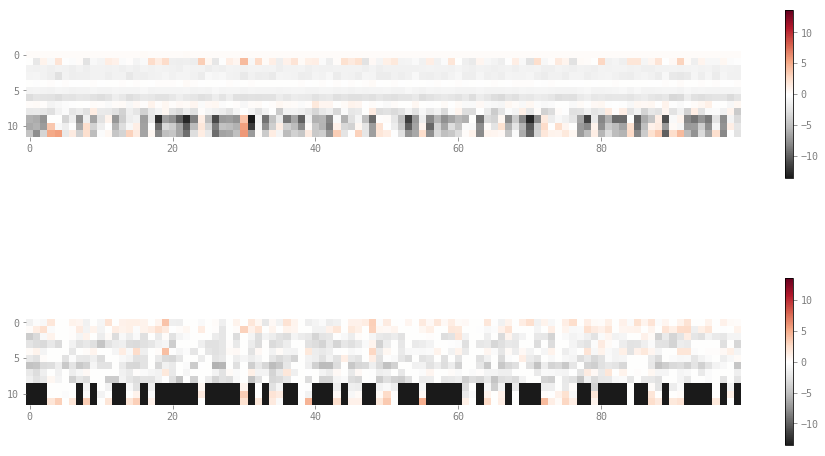

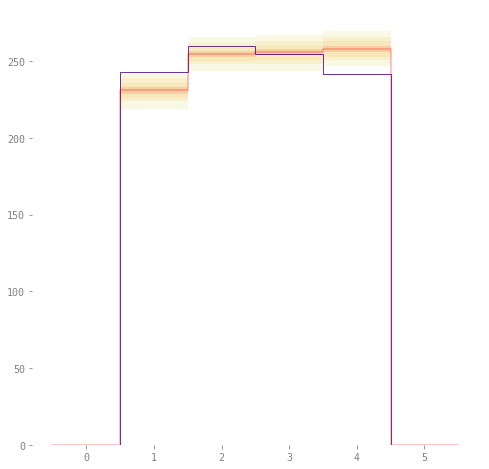

In [10]:
# plot results
print("Results for fit {0}".format(f))
B = FIT[f].extract(pars=['B'])['B'][-1].T
utils.plot_betas(B, DATA[d]['B'])

utils.plot_ppc(DATA[d], FIT[f])

In [11]:
# fit model
m = 'mnl_fhorseshoe'
d = 'all'
f = m + "|" + d

FIT[f] = MODEL[m].sampling(DATA[d], iter=300, control={'adapt_delta':.9, 'max_treedepth':3})

Results for fit mnl_fhorseshoe|all


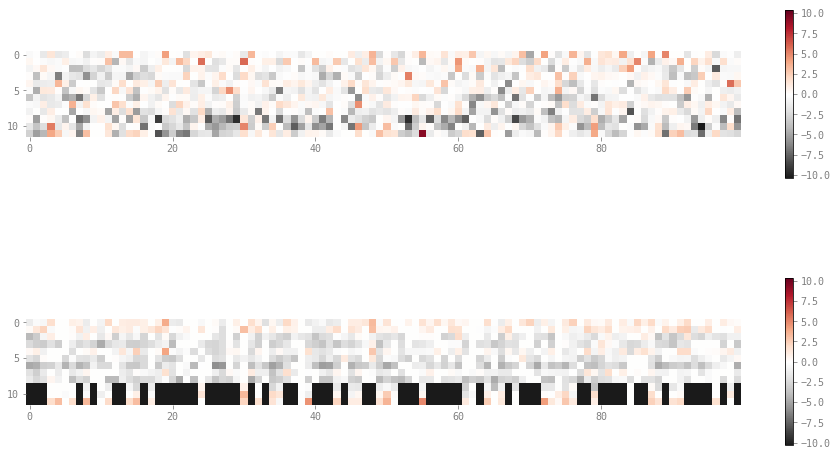

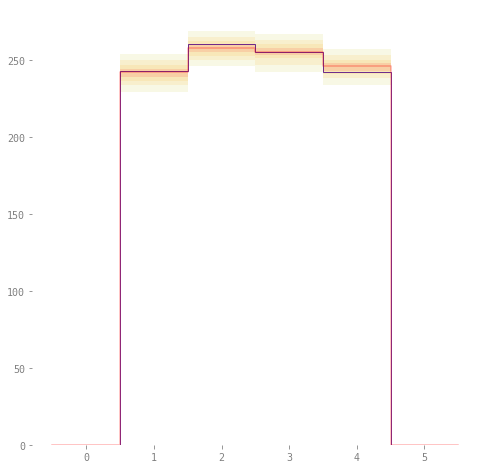

In [12]:
# plot results
print("Results for fit {0}".format(f))
B = FIT[f].extract(pars=['B'])['B'][-1].T
utils.plot_betas(B, DATA[d]['B'])

utils.plot_ppc(DATA[d], FIT[f])